In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# 1. Orders

In [8]:
orders= pd.read_excel("Retail_dataset.xlsx", sheet_name= 2)

In [10]:
orders.shape

(99441, 7)

In [11]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [12]:
orders.order_id.duplicated().sum()

0

In [18]:
orders= orders[orders.order_status== "delivered"]

In [19]:
orders.shape

(96478, 7)

In [20]:
orders.isna().sum().sort_values(ascending=False)

order_approved_at                14
order_delivered_timestamp         8
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_estimated_delivery_date     0
dtype: int64

In [21]:
orders.order_approved_at.fillna(orders.order_purchase_timestamp, inplace= True)
orders.order_delivered_timestamp.fillna(orders.order_estimated_delivery_date, inplace= True)

In [22]:
orders.isna().sum().sort_values(ascending=False)

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

# 2. Order items

In [23]:
order_items= pd.read_excel("Retail_dataset.xlsx", sheet_name= 3)

In [24]:
order_items.shape

(112650, 6)

In [25]:
order_items.isna().sum()

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

In [26]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


# 3. Customers

In [27]:
customers= pd.read_excel("Retail_dataset.xlsx", sheet_name= 4)

In [28]:
customers.shape

(99441, 4)

In [29]:
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [30]:
customers.isna().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [32]:
customers.customer_id.duplicated().sum()

3345

In [33]:
customers.drop_duplicates(subset= "customer_id", keep= "first", inplace= True)

In [34]:
customers.customer_id.duplicated().sum()

0

In [35]:
customers.shape

(96096, 4)

# 4. Payments

In [36]:
payments= pd.read_excel("Retail_dataset.xlsx", sheet_name= 5)

In [37]:
payments.shape

(103886, 5)

In [38]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [39]:
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

# 5. Products

In [40]:
products= pd.read_excel("Retail_dataset.xlsx", sheet_name= 6)

In [41]:
products.shape

(32951, 6)

In [42]:
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [44]:
products.isna().sum().sort_values(ascending= False)

product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
product_id                 0
dtype: int64

In [47]:
products["product_category_name"].mode()[0]

'toys'

In [49]:
products["product_category_name"].fillna(products["product_category_name"].mode()[0], inplace= True)

In [50]:
products.isna().sum().sort_values(ascending= False)

product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
product_id               0
product_category_name    0
dtype: int64

In [51]:
products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


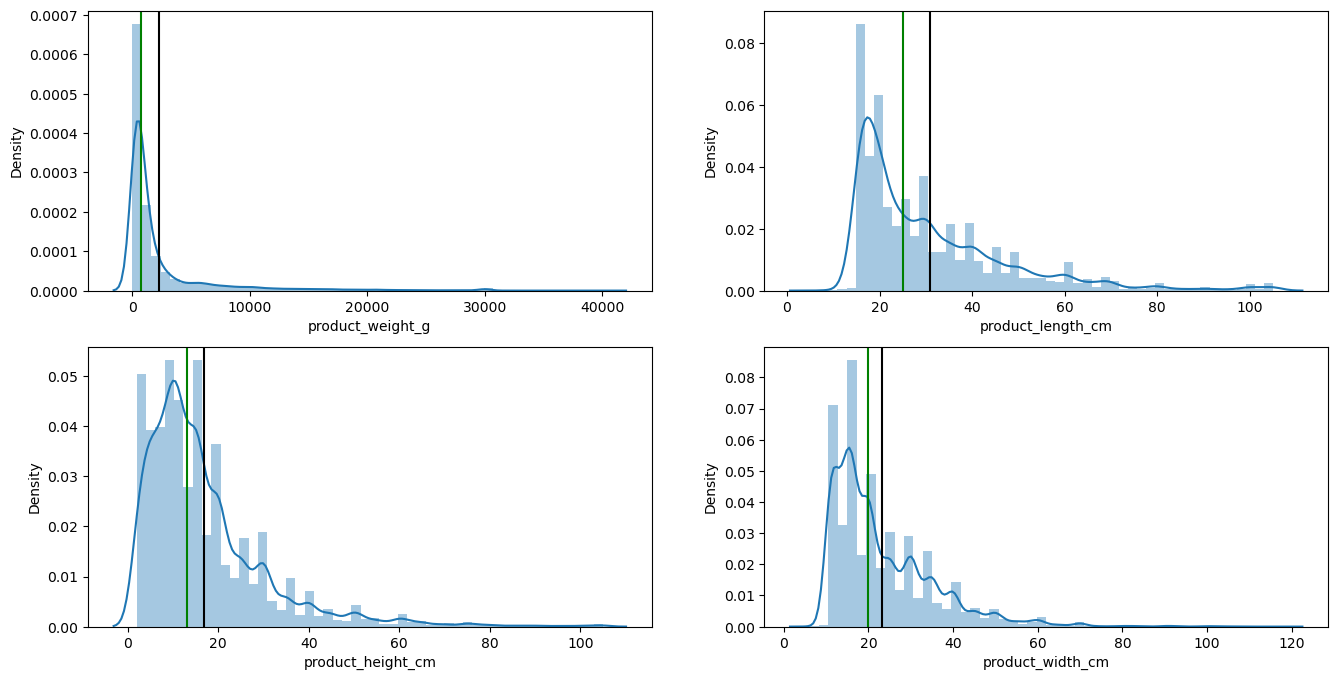

In [53]:
plt.figure(figsize= (16,8))

plt.subplot(2,2,1)
sns.distplot(products.product_weight_g)
plt.axvline(products.product_weight_g.mean(),color= "black")
plt.axvline(products.product_weight_g.median(),color= "green")

plt.subplot(2,2,2)
sns.distplot(products.product_length_cm)
plt.axvline(products.product_length_cm.mean(),color= "black")
plt.axvline(products.product_length_cm.median(),color= "green")


plt.subplot(2,2,3)
sns.distplot(products.product_height_cm)
plt.axvline(products.product_height_cm.mean(),color= "black")
plt.axvline(products.product_height_cm.median(),color= "green")



plt.subplot(2,2,4)
sns.distplot(products.product_width_cm)
plt.axvline(products.product_width_cm.mean(),color= "black")
plt.axvline(products.product_width_cm.median(),color= "green")



In [54]:
products.product_weight_g.fillna(products.product_weight_g.median(), inplace= True)
products.product_length_cm.fillna(products.product_length_cm.median(), inplace= True)
products.product_height_cm.fillna(products.product_height_cm.median(), inplace= True)
products.product_width_cm.fillna(products.product_width_cm.median(), inplace= True)


In [55]:
products.isna().sum().sort_values(ascending= False)

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

In [56]:
Market = pd.ExcelWriter("Retail_dataset_new.xlsx", engine = 'xlsxwriter')

In [57]:
orders.to_excel(Market, sheet_name = "order", index = False)
order_items.to_excel(Market, sheet_name = "order_items", index = False)
customers.to_excel(Market, sheet_name = "customers", index = False)
payments.to_excel(Market, sheet_name = "payments", index = False)
products.to_excel(Market, sheet_name = "products", index = False)

In [60]:
pip install xlsxwriter

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [62]:
Market.close()
print("Files exported successfully.")

Files exported successfully.


In [63]:
import os
os.getcwd()

'C:\\Users\\Lenovo\\Downloads'